# MNIST Digit Classification Project
This notebook demonstrates various machine learning approaches for classifying handwritten digits using the famous MNIST dataset. We'll explore different classification algorithms including Random Forest, Logistic Regression, and multi-class classification strategies.

## Overview
- **Dataset**: MNIST (70,000 images of handwritten digits 0-9)
- **Image Size**: 28x28 pixels (784 features)
- **Task**: Multi-class classification (10 classes)
- **Models**: Random Forest, Logistic Regression, One-vs-One, One-vs-Rest

## Table of Contents
1. Data Loading and Exploration
2. Data Preprocessing
3. Model Training with Pipeline
4. Hyperparameter Tuning
5. Alternative Classification Approaches
6. Model Comparison and Evaluation
7. Model Persistence

In [2]:
from sklearn.datasets import fetch_openml

# as_frame=False ensures the data is returned as NumPy arrays instead of Pandas DataFrames
mnist = fetch_openml('mnist_784', as_frame=False)

## 1. Data Loading and Exploration

We'll start by loading the MNIST dataset from scikit-learn's `fetch_openml` function.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's examine the dataset description to understand what we're working with:

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Now let's extract the features (X) and target labels (y) from the dataset:

In [5]:
# Extract features (pixel values) and target labels (digit classes)
# X: Contains the image data, where each row is a flattened 28x28 image (784 pixel values)
# y: Contains the corresponding labels (digits 0-9) for each image
X, y = mnist.data, mnist.target

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [7]:
# Check for missing values (NaN) in the dataset
# np.isnan(X).sum() is the correct way to count NaN values in a NumPy array
# (X == np.nan).sum() does not work as expected for NaN comparison
(X == np.nan).sum()

np.int64(0)

### Data Visualization

Let's create a function to visualize individual digits from our dataset:

In [8]:
def draw_number(arr):
    plt.gray()
    plt.imshow(arr.reshape((28, 28)))
    plt.show()

Let's visualize the first digit in our dataset:

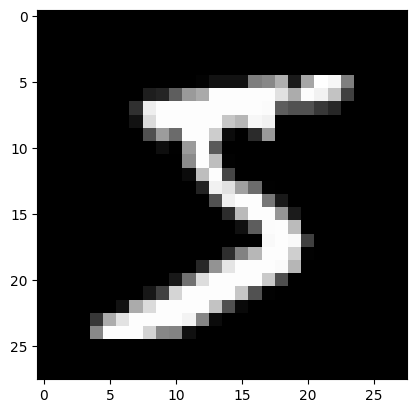

In [9]:
draw_number(X[0])

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [11]:
X[5].astype("float64")

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## 2. Data Preprocessing

Before training our models, let's examine the data types and consider preprocessing steps:

Feature scaling is important for many machine learning algorithms. Let's standardize our features:

In [12]:
# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# This standardizes features by removing the mean and scaling to unit variance
sclaed_x = StandardScaler().fit_transform(X.astype("float64"))

In [13]:
sclaed_x[5]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.09033971e-03, -5.32791506e-03, -3.77967173e-03, -3.77967173e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.77967173e-03, -5.76560474e-03, -8.56450342e-03, -1.13679013e-02,
       -1.46487258e-02, -1.91989290e-02, -2.44645869e-02, -3.01635248e-02,
       -3.19591431e-02, -3.22334599e-02, -3.30400834e-02, -3.08682833e-02,
       -3.02683577e-02, -2.74423638e-02, -2.29285604e-02, -1.85337642e-02,
       -1.61142119e-02, -1.01805633e-02, -7.70728530e-03, -4.05572859e-03,
        0.00000000e+00,  

### Train-Test Split

Let's split our data into training and testing sets for model evaluation:

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Verify the shapes of our training and testing sets
# X_train should contain 80% of samples, X_test 20%, each with 784 features
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

## 3. Model Training with Pipeline

We'll use scikit-learn's Pipeline to combine preprocessing and model training steps. This ensures consistent data processing and makes our workflow more maintainable.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


# Create a pipeline that combines preprocessing and model training
# Step 1: 'scale' - Standardize features (mean=0, std=1)
# Step 2: 'model' - Random Forest classifier with 100 trees by default
# n_jobs=-1: Use all available processors for faster training
# random_state=42: For reproducible results
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=42))
])

In [17]:
# Train the pipeline on our training data
# This will first scale the features (using StandardScaler), then train the Random Forest model
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [18]:
# Make predictions on the test set using the trained pipeline
# The pipeline will automatically apply the same scaling transformation learned from the training data
y_pred = pipe.predict(X_test)

### Model Evaluation

Let's evaluate our model's performance using various metrics:

In [19]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Multilabel Confusion Matrix:\n",
      multilabel_confusion_matrix(y_test, y_pred))

Accuracy:  0.9674285714285714
Confusion Matrix:
 [[1325    0    4    0    1    1    3    1    6    2]
 [   0 1574    5    8    2    0    0    6    3    2]
 [   4    5 1335    4    5    1    9    8    8    1]
 [   1    0   23 1366    0    9    0   14   12    8]
 [   4    1    3    0 1257    0    2    3    3   22]
 [   1    3    3   16    4 1227    8    1    8    2]
 [   5    1    0    0    6   10 1371    0    3    0]
 [   3    5   15    0    7    1    0 1455    2   15]
 [   1    6    9   15    6   11    5    7 1290    7]
 [   4    6    5   16   20    5    1   10    9 1344]]
Multilabel Confusion Matrix:
 [[[12634    23]
  [   18  1325]]

 [[12373    27]
  [   26  1574]]

 [[12553    67]
  [   45  1335]]

 [[12508    59]
  [   67  1366]]

 [[12654    51]
  [   38  1257]]

 [[12689    38]
  [   46  1227]]

 [[12576    28]
  [   25  1371]]

 [[12447    50]
  [   48  1455]]

 [[12589    54]
  [   67  1290]]

 [[12521    59]
  [   76  1344]]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



#### Key Insights:
- **13,641 out of 14,000** test images correctly classified
- **Best performing digits:** 0 (98.7%), 1 (98.4%), 6 (98.2%)
- **Most challenging digits:** 9 (94.6%), 8 (95.1%), 3 (95.3%)

#### Common Confusion Patterns:
- **9 ↔ 4:** Most frequent confusion (handwriting variations)
- **3 ↔ 2:** Similar curved shapes cause misclassification
- **8 ↔ 3/5:** Complex shapes with multiple curves

**Result:** This 96.74% accuracy is excellent for Random Forest and suitable for most practical digit recognition applications.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "model__n_estimators": [25, 50, 100, 200, 300],
    "model__criterion": ['gini', 'entropy', 'log_loss'],
    "model__max_depth": [None, 0, 1, 2, 3, 5, 10]
}

rscv = RandomizedSearchCV(pipe, param_dist, n_jobs=-1, cv=3, verbose=True)

In [22]:
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\Development\Github\dgr\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Development\Github\dgr\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Development\Github\dgr\env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Development\Github\dgr\env\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._f

KeyboardInterrupt: 

In [ ]:
y_pred_rscv = rscv.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rscv))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
y_pred_tr = rscv.best_estimator_.predict(X_train)

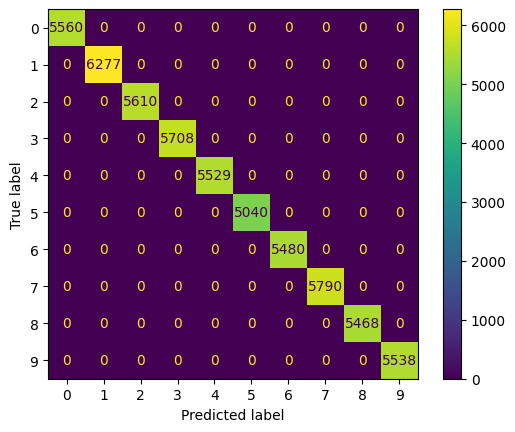

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_tr)

In [ ]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,           # Limit tree depth
    min_samples_split=5,    # Prevent very specific splits
    min_samples_leaf=3,     # Ensure leaves aren't too small
    max_features='sqrt',    # Reduces overfitting in high-dimensional data
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                       n_jobs=-1, random_state=42)

In [ ]:
y_pred_new = clf.predict(X_test)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.95      0.95      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.97      0.96      0.96      1503
           8       0.95      0.94      0.95      1357
           9       0.94      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



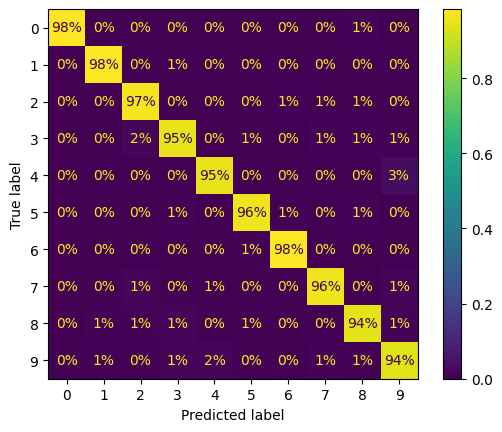

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_new, normalize='true', values_format=".0%")

Trying another model

In [ ]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

d:\Development\Github\dgr\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_log_tr = log_reg_model.predict(X_train)

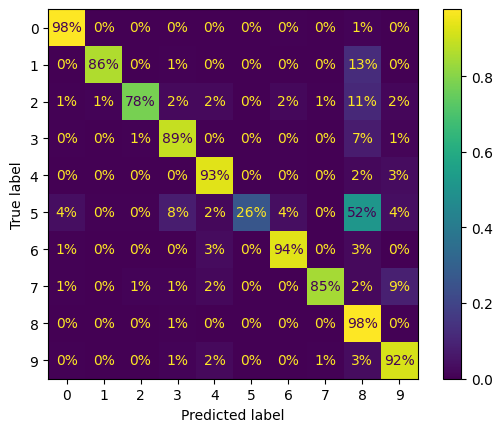

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_log_tr, normalize='true', values_format=".0%")

In [ ]:
y_pred_log = log_reg_model.predict(X_test)

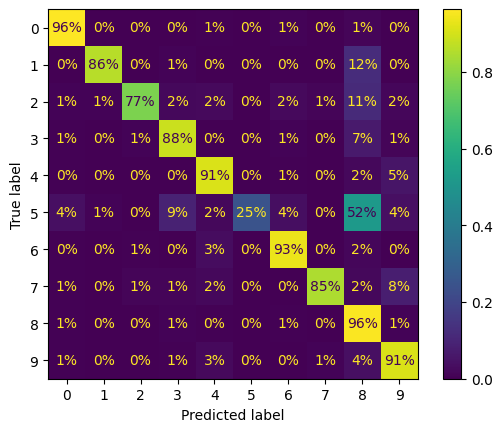

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log, normalize='true', values_format=".0%")

We can observe that the classifier is getting confused and predicting 5 as 8, which is evident based on the digits desgin and shape

### Multi-class Classification Strategies

#### One-vs-One (OvO) Classification

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(LogisticRegression(), n_jobs=-1)

In [ ]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
y_pred_ovo_tr = ovo_clf.predict(X_train)

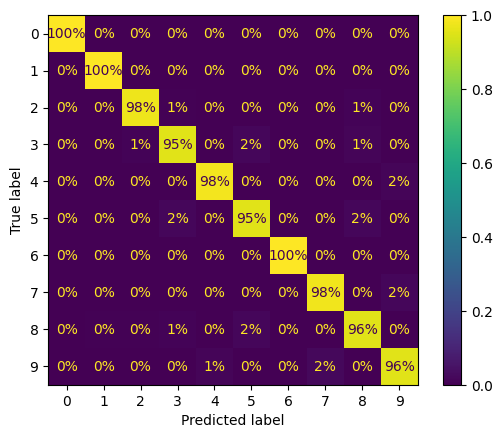

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_ovo_tr, normalize='true', values_format=".0%")

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
y_pred_ovo = ovo_clf.predict(X_test)

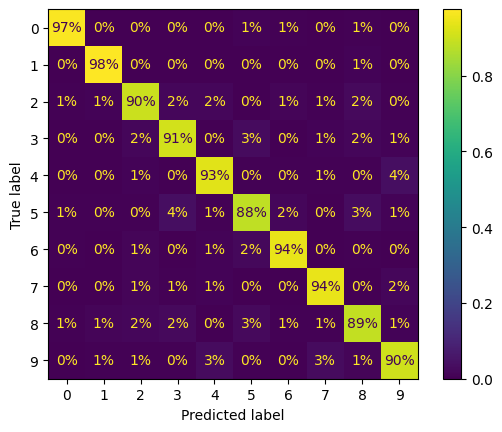

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_ovo, normalize='true', values_format=".0%")

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ova_clf = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)

In [ ]:
ova_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
y_pred_ova_tr = ova_clf.predict(X_train)

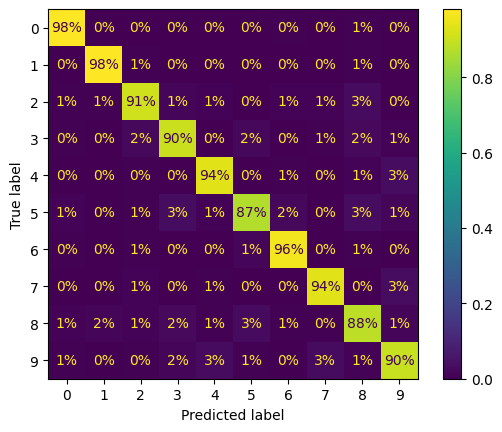

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_train, y_pred_ova_tr, normalize='true', values_format=".0%")

In [ ]:
len(ova_clf.estimators_)

10

In [ ]:
y_pred_ova = ova_clf.predict(X_test)

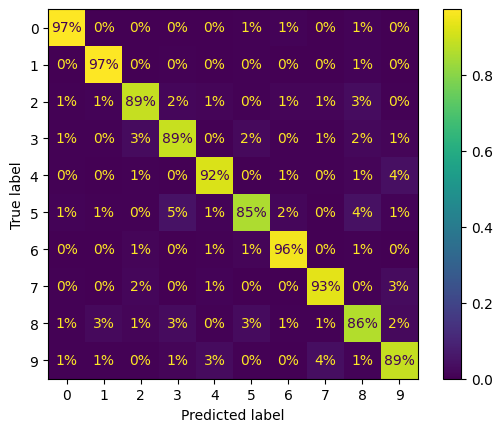

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_ova, normalize='true', values_format=".0%")

Checking errors instead of correctness

In [ ]:
# Create sample weights that highlight misclassified examples
# This assigns a weight of 1 to misclassified examples and 0 to correctly classified ones
sample_weight = (y_pred_ova_tr != y_train)

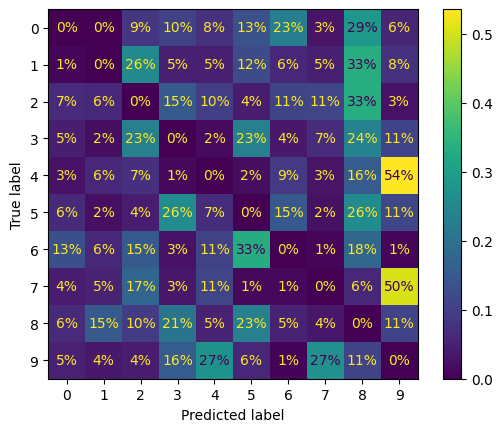

In [ ]:
# Display confusion matrix for OvA training predictions, weighted by misclassifications
# This helps to visualize which specific errors the model is making on the training dat
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_ova_tr, sample_weight=sample_weight, normalize="true", values_format=".0%")

## 6. Model Persistence

Finally, let's save our best performing model for future use:

In [ ]:
import joblib

# Save the best Random Forest model found by RandomizedSearchCV
# rscv.best_estimator_ is the entire pipeline (scaler + RandomForest)


joblib.dump(rscv.best_estimator_, 'random_forest_clf.joblib')
print(f"Best parameters found: {rscv.best_params_}")
print(f"Best cross-validation score: {rscv.best_score_:.4f}")

['random_forest_clf.joblib']